### Key questions

**1. What guests are searching for in Dublin?**

**2. Which inquiries hosts tend to accept?**

**3. What the gaps are between guest demand and host supply that the new city manager could plug to increase the number of bookings in Dublin?**

Based on the findings the new city manager will try to boost the number and quality of hosts in Dublin to fit the demands from guests. The goal of this challenge is to analyze, understand, visualize, and communicate the demand / supply in the market. For example you may want to look at the breakdown of start date day of the week, or number of nights, or room type that is searched for, and how many hosts accepted the reservation. In particular, we are interested in:


What other data would be useful to have to deepen the analysis and understanding?

In [40]:
#Import libraries/dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#contacts_file = ("contacts.tsv")
contacts = pd.read_csv('C:/Users/hwoo2/Desktop/pandas/AirBnB Dublin Market Assessment/contacts.tsv', sep="\t")

#searches_file = ("searches.tsv")
searches = pd.read_csv('C:/Users/hwoo2/Desktop/pandas/AirBnB Dublin Market Assessment/searches.tsv', sep="\t")

In [41]:
# undestand what table looks like
searches.info()
searches.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35737 entries, 0 to 35736
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ds                    35737 non-null  object 
 1   id_user               35737 non-null  object 
 2   ds_checkin            23888 non-null  object 
 3   ds_checkout           23888 non-null  object 
 4   n_searches            35737 non-null  int64  
 5   n_nights              23888 non-null  float64
 6   n_guests_min          35737 non-null  int64  
 7   n_guests_max          35737 non-null  int64  
 8   origin_country        35737 non-null  object 
 9   filter_price_min      13322 non-null  float64
 10  filter_price_max      13322 non-null  float64
 11  filter_room_types     16191 non-null  object 
 12  filter_neighborhoods  1346 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 3.5+ MB


,ds,id_user,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types,filter_neighborhoods
26843,2014-10-11,e8f049d5-5f73-4bf9-bb12-2957229edf90,NaN,NaN,3,NaN,1,16,AT,NaN,NaN,",Entire home/apt",NaN
1376,2014-10-01,86a28708-745e-4f3e-aeb3-ef438abd6f9b,NaN,NaN,4,NaN,1,1,DE,NaN,NaN,NaN,NaN
31155,2014-10-13,7d25d396-bf80-4501-accf-5399a6046707,2014-12-29,2014-12-30,1,1.0,3,3,GB,NaN,NaN,Entire home/apt,NaN


In [42]:
#clean searches dataset

searches['ds'] = pd.to_datetime(searches['ds'])
searches['ds_checkin'] = pd.to_datetime(searches['ds_checkin'])
searches['ds_checkout'] = pd.to_datetime(searches['ds_checkout'])
searches['origin_country'] = searches['origin_country'].astype('category')
searches['filter_room_types'] = searches['filter_room_types'].astype('category')


### Searches table overview: In Dublin, people are more vague with their AirBnb stay plans, rather than having a clearly planned out vacation
1. Some people aren't fixed to a timeline for their travels; 33% of searches don't have a check in/out date
2. People don't seem too price sensitive OR they start with a general search to understand what properties are available before narrowing their search apeture, as 63% of price filters in searches are unused: 
2. The vast majority of people visiting Dublin don't seem to do too much research into the neighborhoods; 96% of searches don't included a neighborhood filter


In [43]:
# Find % of null values in datasets 
print('Searches')
print(searches.isna().sum()/len(searches))

Searches
ds                      0.000000
id_user                 0.000000
ds_checkin              0.331561
ds_checkout             0.331561
n_searches              0.000000
n_nights                0.331561
n_guests_min            0.000000
n_guests_max            0.000000
origin_country          0.000000
filter_price_min        0.627221
filter_price_max        0.627221
filter_room_types       0.546940
filter_neighborhoods    0.962336
dtype: float64


### Searches table target audience profile: The Dublin marketplace attracts somewhat spur of the moment solo travelers or couples (romatic or platonic) from Americans and Europe 
1. The median search is ~0.9 months ahead of the planned arrival time, and the average is ~1.7 months in advance (average is skewed by bookings well over a year out). This suggests posting changes must be incorporated about 2 months in advance
2. Searchers primarily hail from Ireland (22% of searchers), the US (19%), Great Britain (16%), or France (12%). Given Hosts may be looking up their own properties to ensure their postings look good, we can hypothesize that the Dublin marketplace attracts Americans and Europeans within a few hours flight. 
3. The Interquartile range of min/max guests was 1-2 persons, and the IQR of stay duration was 2-5 nights, which indicates advertising for the local market is best suited around themes of individual exploration, couples retreats, and friend trips

In [44]:
# overall summary table to get a sense of what the quantitative metrics say
searches.describe()

,n_searches,n_nights,n_guests_min,n_guests_max,filter_price_min,filter_price_max
count,35737.000000,23888.000000,35737.000000,35737.000000,13322.000000,1.332200e+04
mean,9.206565,7.672765,1.742955,2.105857,8.470200,9.019063e+07
std,17.348746,21.557614,1.460440,1.817358,53.987679,2.978482e+08
min,1.000000,0.000000,1.000000,1.000000,0.000000,9.000000e+00
25%,1.000000,2.000000,1.000000,1.000000,0.000000,8.600000e+01
50%,4.000000,3.000000,1.000000,2.000000,0.000000,1.390000e+02
75%,10.000000,5.000000,2.000000,2.000000,0.000000,3.010000e+02
max,448.000000,399.000000,16.000000,16.000000,1250.000000,1.073742e+09


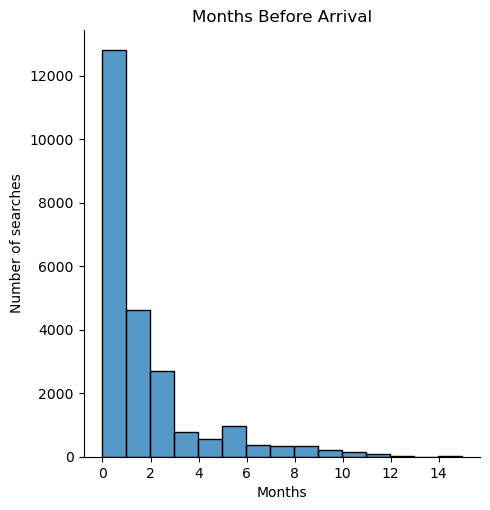

In [45]:
# Graph showing how far in advance searches happen

searches['time_before_arrival'] = searches['ds_checkin'] - searches['ds']
searches['time_before_arrival'] = searches['time_before_arrival'].dt.days/30

sns.displot(data = searches[searches['time_before_arrival']<15]['time_before_arrival'], binwidth = 1).set(title = 'Months Before Arrival', \
    xlabel = 'Months', ylabel = 'Number of searches')
plt.show()

In [46]:
#Numeric represenation of typical time before arrival in search

print(' Median number of months before arrival: ', searches['time_before_arrival'].median(), 
      '\n', 'Average number of months before arrival: ', searches['time_before_arrival'].mean())

 Median number of months before arrival:  0.8666666666666667 
 Average number of months before arrival:  1.7113864701941912


In [47]:
#Table of searches to understand where customers are coming from

country = searches.groupby(by = 'origin_country')

country_cts = (country.agg({'origin_country':'count'})
    .rename(columns = {'origin_country':'num_visitors'})
    .sort_values(by = 'num_visitors', ascending = False)).head(10)


total = country_cts['num_visitors'].sum()
country_perc = (country_cts['num_visitors']/total).to_frame()

country_split = pd.concat(objs = [country_cts,country_perc], axis = 1)

country_split


,num_visitors,num_visitors
origin_country,,
IE,6608,0.221396
US,5811,0.194693
GB,4832,0.161892
FR,3444,0.115388
IT,2333,0.078165
DE,2170,0.072704
ES,1759,0.058934
CA,1085,0.036352
AU,962,0.032231


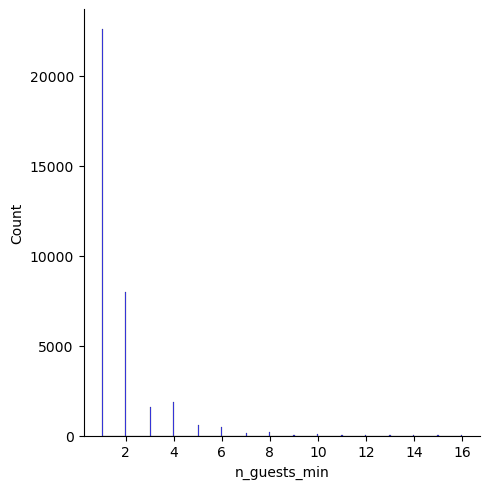

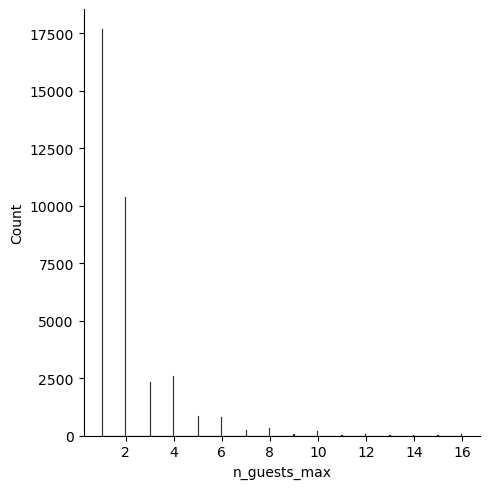

In [48]:
#Distribution plot of n_guests_min and n_guests_max
sns.displot(searches, x = 'n_guests_min', color = 'blue')
sns.displot(searches, x = 'n_guests_max', color = 'black')
plt.show()

### Searches table target audience needs: These travelers are typically looking for cheap, weekend stays with some privacy 

1. The median price/night in price bound searches was 139 dollars/night
2. Stays within the Thursday - Monday range (3 days or less) represented the top 5 search ranges, and 29% of all date bound searches
3. Most of the searchers wanted and entire apartment/house or private room

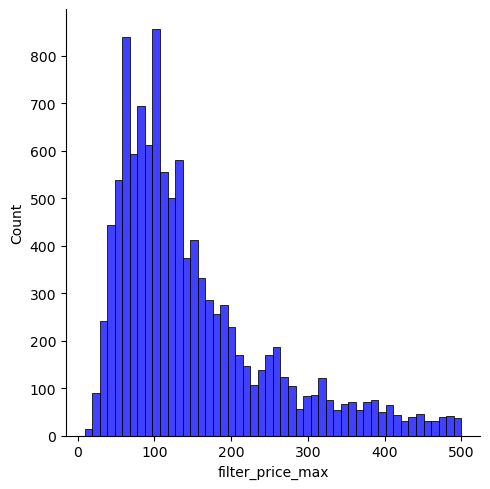

In [49]:
#Distribution of prices for searches with outliers removed for visual clarity 

#Removing the set upper limit
searches_maxprice_removed = searches[searches['filter_price_max'] <= 500]

#Distribution plot of filter_price_max column
sns.displot(x=searches_maxprice_removed["filter_price_max"], color = 'blue')
plt.show()

In [50]:
# Table showing top day ranges for stays

stay_days = searches.dropna(subset=['ds_checkin', 'ds_checkout'])

checkins = stay_days['ds_checkin'].dt.day_name()
checkouts = stay_days['ds_checkout'].dt.day_name()


stay_days['days_stayed'] = stay_days['n_nights'].astype('str') + ': ' + checkins + ' - ' + checkouts

stay_days['days_stayed'].value_counts(normalize = True).sort_values(ascending = False).head(10)

C:\Users\hwoo2\AppData\Local\Temp\ipykernel_22380\1145123011.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stay_days['days_stayed'] = stay_days['n_nights'].astype('str') + ': ' + checkins + ' - ' + checkouts


2.0: Friday - Sunday       0.097329
3.0: Friday - Monday       0.060951
1.0: Saturday - Sunday     0.048183
3.0: Thursday - Sunday     0.045002
2.0: Saturday - Monday     0.034452
4.0: Monday - Friday       0.032527
1.0: Friday - Saturday     0.029136
3.0: Saturday - Tuesday    0.027545
4.0: Thursday - Monday     0.023275
3.0: Tuesday - Friday      0.022438
Name: days_stayed, dtype: float64

In [51]:
#Types of rooms searched for

searches['filter_room_types'].dropna().value_counts().head(10)

,Entire home/apt                                              6331
Entire home/apt                                               3667
,Private room                                                 1693
Private room                                                  1147
,Entire home/apt,Entire home/apt,Private room                  415
Entire home/apt,Private room                                   379
,Entire home/apt,Entire home/apt,Private room,Private room     370
,Entire home/apt,Private room                                  365
,Entire home/apt,Private room,Private room                     230
,Private room,Entire home/apt                                  137
Name: filter_room_types, dtype: int64

### Contacts table overview: Hosts only accept about 50% of inquiries which come mostly from parties of 1-2 people

1. Hosts are somewhat selective of the potential residents who inquire; only 28% of initial inquries result in a booking of that property. This rate is primarily due to hosts only accepting 50% of the inquiries, and ~60% of those inquirers actually booking
2. Inquiries tend to come from couples; 44% of inquiries came from parties of 2, and 27% came from parties of 1

In [52]:
# Find % of null values in datasets 
print('Contacts')
print(contacts.isna().sum()/len(contacts))

print('\n')


Contacts
id_guest          0.000000
id_host           0.000000
id_listing        0.000000
ts_contact_at     0.000000
ts_reply_at       0.077208
ts_accepted_at    0.536367
ts_booking_at     0.722101
ds_checkin        0.000000
ds_checkout       0.000000
n_guests          0.000000
n_messages        0.000000
dtype: float64




In [53]:
#Manipulation of contacts dataset

#Convert date columns to datetime data type 
contacts['ts_contact_at'] = pd.to_datetime(contacts['ts_contact_at'])
contacts['ts_reply_at'] = pd.to_datetime(contacts['ts_reply_at'])
contacts['ts_accepted_at'] = pd.to_datetime(contacts['ts_accepted_at'])
contacts['ts_booking_at'] = pd.to_datetime(contacts['ts_booking_at'])
contacts['ds_checkin'] = pd.to_datetime(contacts['ds_checkin'])
contacts['ds_checkout'] = pd.to_datetime(contacts['ds_checkout'])
contacts['accepted'] = np.where(np.isnan(contacts['ts_accepted_at']), False, True)

contacts['length_stay'] = contacts['ds_checkout'] - contacts['ds_checkin']

#Understand dataset
display(contacts.dtypes)
display(contacts.describe())

id_guest                   object
id_host                    object
id_listing                 object
ts_contact_at      datetime64[ns]
ts_reply_at        datetime64[ns]
ts_accepted_at     datetime64[ns]
ts_booking_at      datetime64[ns]
ds_checkin         datetime64[ns]
ds_checkout        datetime64[ns]
n_guests                    int64
n_messages                  int64
accepted                     bool
length_stay       timedelta64[ns]
dtype: object

,n_guests,n_messages,length_stay
count,7823.000000,7823.000000,7823
mean,2.422600,6.319954,5 days 19:25:32.864629937
std,1.617347,6.472827,14 days 23:45:24.447710564
min,1.000000,1.000000,1 days 00:00:00
25%,1.000000,2.000000,2 days 00:00:00
50%,2.000000,4.000000,3 days 00:00:00
75%,3.000000,8.000000,5 days 00:00:00
max,16.000000,102.000000,334 days 00:00:00


In [54]:
#conversion rate in pipeline from initial outreach to booking

#contact to reply
print(contacts['ts_reply_at'].count() / contacts['ts_contact_at'].count())

#reply to accept
print(contacts['ts_accepted_at'].count() / contacts['ts_reply_at'].count())

#accept to book
print(contacts['ts_booking_at'].count() / contacts['ts_accepted_at'].count())

#outreach to booking
print(contacts['ts_booking_at'].count() / contacts['ts_contact_at'].count())

0.9227917678639908
0.5024241584707023
0.5993934381031155
0.27789850441007286


In [55]:
contacts['n_guests'].value_counts(normalize = True)

2     0.442541
1     0.270229
4     0.111211
3     0.089480
6     0.035025
5     0.029017
7     0.007925
8     0.007031
10    0.003068
12    0.001917
16    0.000639
11    0.000639
15    0.000511
13    0.000383
9     0.000383
Name: n_guests, dtype: float64

### Supply and Demand interactions: There is uncaptured downstream market demand for singles and couples during Q4 of the year
1. There doesn't seem to be enough supply to meet demand for parties with a size of 1-2; the number of accepted inquiries was significantly lower than the number of inquries for n_guests = 1 or 2. This represents uncaptured potential revenue 
2. Peak season is October - December, and it seems like there's a shortfall in supply in October, as there is a significantly higher number of non-acceptances than acceptances in this month. May need to investigate further to discern if it's because owners can't bring supply to market in October, or they aren't aware of the demand in October, and only are reacting to the shortfall and upping supply by following month
3. Under 100 dollars a night, there's significantly more demand than supply. This could stem from some combination of different operations challenges (i.e., it's not worth the management hassle for hosts relative to their margins from charging 100 dollars/day) or operating cost constraints (i.e., the properties currently on the market aren't suited for low priced stays)

In [56]:
agg = contacts.merge(searches, left_on = 'id_guest', right_on = 'id_user', suffixes = ('_inquiry','_search'))
agg.head()

,id_guest,id_host,id_listing,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin_inquiry,ds_checkout_inquiry,n_guests,...,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types,filter_neighborhoods,time_before_arrival
0,000dfad9-459b-4f0b-8310-3d6ab34e4f57,13bb24b8-d432-43a2-9755-5ea11b43bb69,21d2b1a2-fdc3-4b4c-a1f0-0eaf0cc02370,2014-10-04 16:26:28,2014-10-04 16:26:28,2014-10-04 16:26:28,2014-10-04 16:26:28,2014-10-13,2014-10-15,2,...,6,2.0,2,2,CA,0.0,130.0,",Entire home/apt",NaN,0.300000
1,00197051-c6cb-4c3a-99e9-86615b819874,46aa3897-9c00-4d76-ac66-a307593d0675,fb5ed09a-9848-4f2c-b2ef-34deb62164fb,2014-11-04 09:10:03,2014-11-04 09:45:50,2014-11-04 09:45:50,2014-11-04 12:20:46,2014-11-27,2014-11-30,1,...,13,3.0,1,1,DK,0.0,336.0,",Entire home/apt,Private room,Private room",NaN,1.466667
2,0027538e-aa9e-4a02-8979-b8397e5d4cba,6bbb88ca-db66-48c5-9c4b-862f7706284a,d3871da6-8012-4dc4-b508-c91f2c10c297,2014-10-10 12:02:50,2014-10-10 15:07:01,NaT,NaT,2014-10-17,2014-10-19,2,...,21,2.0,2,2,CY,0.0,1258.0,",Entire home/apt,Entire home/apt,Private room,...",NaN,0.266667
3,0027538e-aa9e-4a02-8979-b8397e5d4cba,6bbb88ca-db66-48c5-9c4b-862f7706284a,d3871da6-8012-4dc4-b508-c91f2c10c297,2014-10-10 12:02:50,2014-10-10 15:07:01,NaT,NaT,2014-10-17,2014-10-19,2,...,44,2.0,2,2,CY,0.0,214.0,",Entire home/apt",NaN,0.233333
4,0027538e-aa9e-4a02-8979-b8397e5d4cba,8772bc85-a9b7-4d85-a52d-41f3620c2912,0d9b5583-8053-4b67-adfe-8c29eb12efed,2014-10-10 15:23:53,NaT,NaT,NaT,2014-10-17,2014-10-19,2,...,21,2.0,2,2,CY,0.0,1258.0,",Entire home/apt,Entire home/apt,Private room,...",NaN,0.266667


Average guests contacted:  2.42260002556564


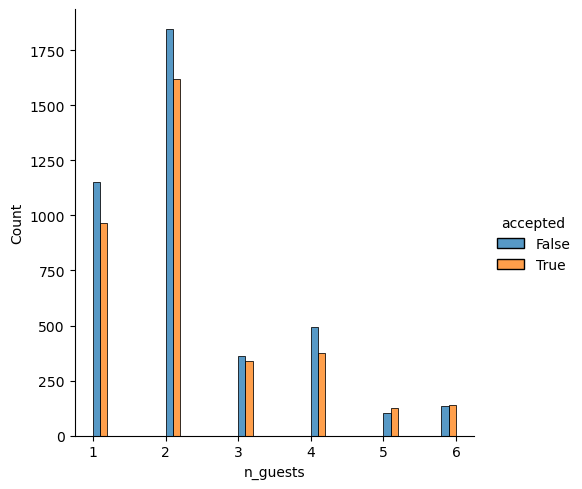

In [57]:
# show inquiries vs accepted, cutting out outliers to make visual clearer

sns.displot(contacts[contacts['n_guests'] <= 6], x = 'n_guests', hue = 'accepted', multiple = 'dodge')
print('Average guests contacted: ',contacts['n_guests'].mean())

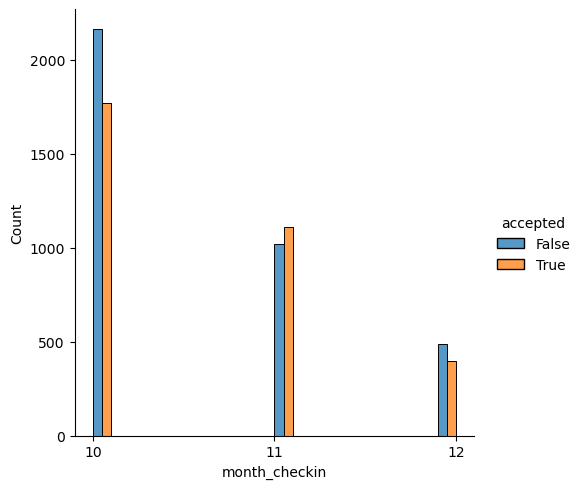

In [59]:
#What does demand/supply look like over time

contacts['month_checkin'] = contacts['ds_checkin'].dt.month #Extract month from checkin date

contacts_checkin = contacts[contacts['month_checkin'] > 9]

#Peak season checkings
sns.displot(contacts_checkin, x='month_checkin', hue = 'accepted', multiple="dodge")
plt.xticks([10, 11, 12])
plt.show()

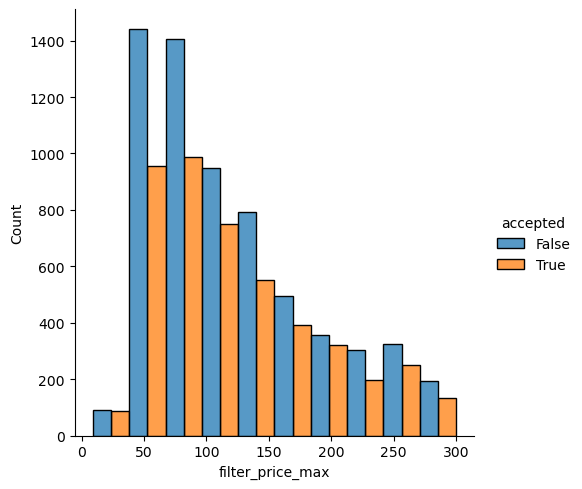

In [60]:
#Check difference between prices searched between accepted/rejected applicants

maxprice = agg.loc[(agg['filter_price_max'] <= 300)]

sns.displot(maxprice, x="filter_price_max", hue="accepted", multiple="dodge", bins = 10)
plt.show()

### Key next steps from findings
1. Understand the current profile of the 1-2 person properties to scope path to adding more properties to suit this party size. There may be an opportunity to encourage more hosts to bring their 1-2 person properties into the Dublin market OR redirect larger properties to split by private room if general housing supply in Dublin is constrained
2. Run A/B testing on advertisements for 2-person parties in America and Europe to increase conversion from casual browsing to outright booking by targeting our key demographic groups
3. Investigate whether the lack of sub-100 dollar/night properties is due to legitimate host cost constraints, or lack of incentivization to price lower. Potentially consider some sort of kickback program for sub 100 bookings where some of incremental revenue is shared with host to rightsize their margins otherwise